## I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman

In [15]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
from patsy import dmatrices  
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score 
dta =sm.datasets.fair.load_pandas().data    


In [5]:
dta.shape

(6366, 9)

In [6]:
dta.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000


In [8]:
# add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)  
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)', dta, return_type="dataframe")   
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',  
'C(occupation)[T.3.0]':'occ_3',  
'C(occupation)[T.4.0]':'occ_4',  
'C(occupation)[T.5.0]':'occ_5',  
'C(occupation)[T.6.0]':'occ_6',  
'C(occupation_husb)[T.2.0]':'occ_husb_2',  
'C(occupation_husb)[T.3.0]':'occ_husb_3',  
'C(occupation_husb)[T.4.0]':'occ_husb_4',  
'C(occupation_husb)[T.5.0]':'occ_husb_5',  
'C(occupation_husb)[T.6.0]':'occ_husb_6'})  
y = np.ravel(y)   


In [10]:
X.shape

(6366, 17)

In [11]:
y.shape

(6366,)

array([1., 1., 1., ..., 0., 0., 0.])

In [16]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

## Build with all the independent variables first.

In [21]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(x_test)

In [24]:
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.7204773869346733
Precision: 0.6082474226804123
Recall: 0.3484251968503937
F-1 Score: 0.4430538172715895


In [27]:
from sklearn.metrics import classification_report
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))

print(classification_report(y_test,y_pred))

The Training Accuracy is:  0.729576874738165
The Testing Accuracy is:  0.7204773869346733
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1084
         1.0       0.61      0.35      0.44       508

   micro avg       0.72      0.72      0.72      1592
   macro avg       0.68      0.62      0.63      1592
weighted avg       0.70      0.72      0.70      1592



In [28]:
from sklearn.metrics import roc_auc_score
area_roc=roc_auc_score(y_test,y_pred)
area_roc

0.6216295725949386

In [29]:
## plotting roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test,log_reg.predict_proba(x_test)[:,1])

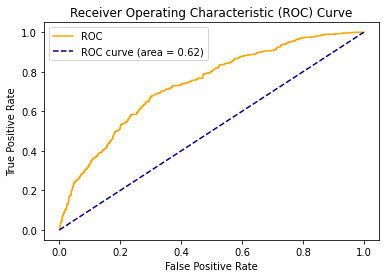

In [30]:
#plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % area_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Dropping independent variables that are less important from VIF

In [31]:
X.drop(columns=['occ_2','occ_3','occ_4','occ_5'],inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,1.089356,occ_6
2,5.503186,occ_husb_2
3,2.972230,occ_husb_3
4,6.883075,occ_husb_4
5,6.528460,occ_husb_5
6,3.174518,occ_husb_6
7,1.036448,rate_marriage
8,5.466245,age
9,7.145848,yrs_married


In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.7154522613065326
Precision: 0.5945017182130584
Recall: 0.3405511811023622
F-1 Score: 0.4330413016270338


## Accuraacy Dropped with less variables so will take the model with all the independent variables as that comes out the best model